**Chapter 9 – Unsupervised Learning**

_This notebook contains all the sample code in chapter 9._

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

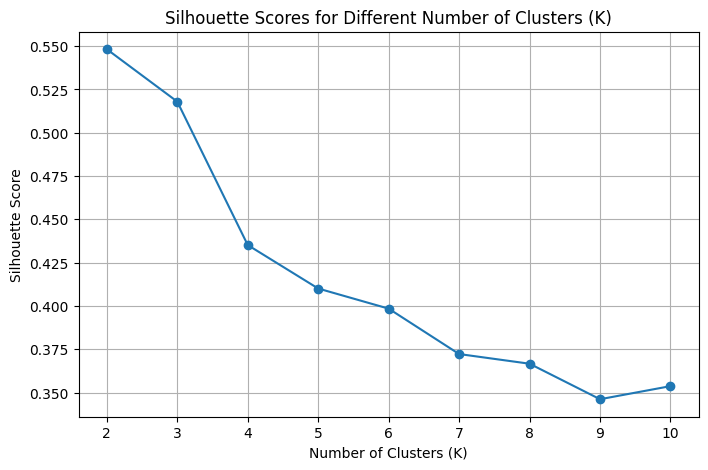

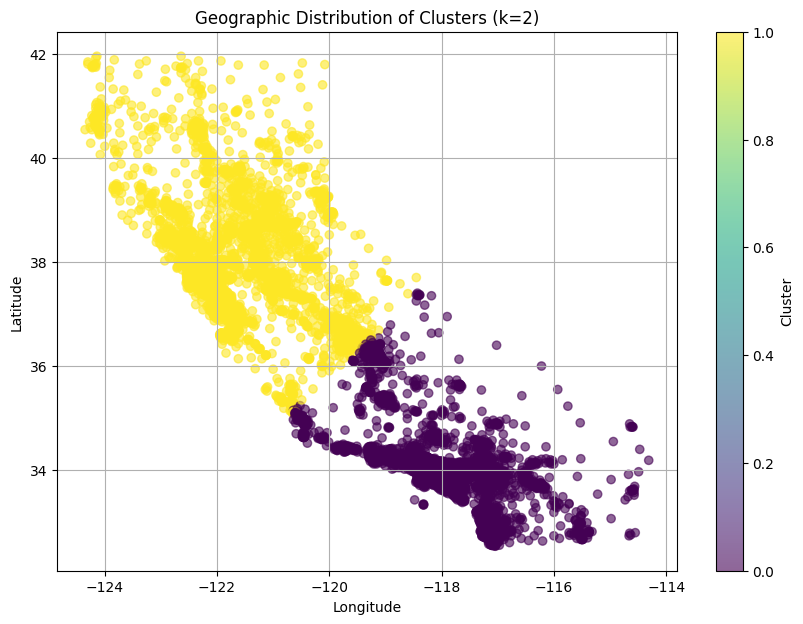

In [6]:
# Importing necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: Load the California Housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Step 2: Extract relevant features: Longitude, Latitude, and Median Income
features = df[['Longitude', 'Latitude', 'MedInc']]

# Step 3: Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 4: Define a function to calculate silhouette scores for a range of cluster configurations
def calculate_silhouette_scores(data, range_n_clusters):
    silhouette_avg = {}
    for n_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(data)

        # Calculate the silhouette score
        score = silhouette_score(data, cluster_labels)
        silhouette_avg[n_clusters] = score

    return silhouette_avg

# Step 5: Optimize the number of clusters (k) by calculating silhouette scores for k = 2 to 10
range_n_clusters = range(2, 11)
silhouette_scores = calculate_silhouette_scores(features_scaled, range_n_clusters)

# Step 6: Plot silhouette scores to visualize the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o')
plt.title("Silhouette Scores for Different Number of Clusters (K)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Step 7: Apply K-Means with the optimal number of clusters
# Assuming the best k is found from the silhouette plot, for example, k=4
optimal_k = max(silhouette_scores, key=silhouette_scores.get)
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Step 8: Visualize the resulting clusters
plt.figure(figsize=(10, 7))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis', marker='o', alpha=0.6)
plt.colorbar(label='Cluster')
plt.title(f"Geographic Distribution of Clusters (k={optimal_k})")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()
